### Linear Regression

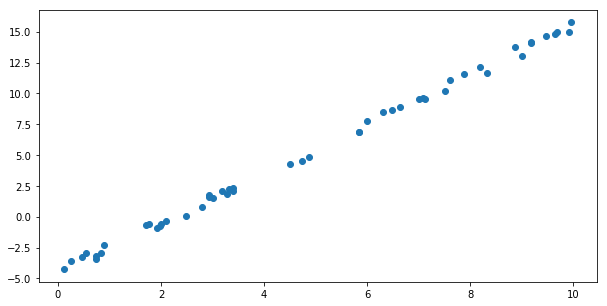

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = 10 * np.random.random((50,))
y = 2 * x - 5 + np.random.random((50,))
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
X = x.reshape(-1, 1)
X.shape, y.shape

((50, 1), (50,))

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

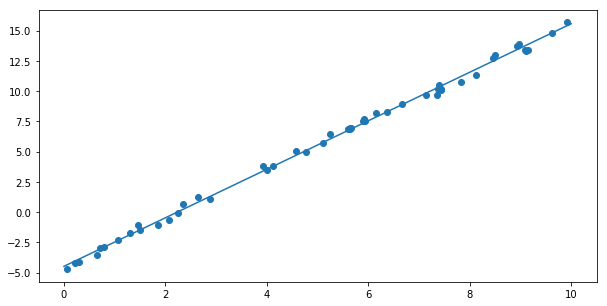

In [19]:
x_fit = np.linspace(0, 10, 1000)
y_fit = model.predict(x_fit.reshape(-1, 1))
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.show()

In [20]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [ 2.005566]
Model intercept: -4.48236177514


In [21]:
# y = ax + b = a0 + a1*x; y = intercept_ + coef_[0]*x

### Multidimensional Linear Model

In [22]:
X = 10 * np.random.random((100, 3))
y = 0.5 + np.dot(X, [1.5, -2., 1.])
X.shape, y.shape

((100, 3), (100,))

In [23]:
model.fit(X, y)
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [ 1.5 -2.   1. ]
Model intercept: 0.5


In [24]:
# y = a0 + a1*x1 + a2*x2 + a3*x3; y = intercept_ + coef_[0]*X[0] + coef_[1]*X[1] + coef_[2]*X[2]
# ilosc elementow w coef_ jest rowna ilosci ficzerow
# wartosci w coef_ okreslaja jaki ficzer ma jaki wplyw na y (ktory najmniejszy, ktory najwiekszy, ktory ujemny)

### Polynomial Linear Regression
#### the linearity refers to the fact that the coefficients an(a0, a1, a2, ...) never multiply or divide each other

In [25]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
x.shape

(3,)

In [26]:
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x[:, None])
x_poly.shape

(3, 3)

In [27]:
# y = a1*x + a2*x**2 + a3*x**3 (include_bias=False)
# y = a0*1 + a1*x + a2*x**2 + a3*x**3 (include_bias=True)

In [28]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())

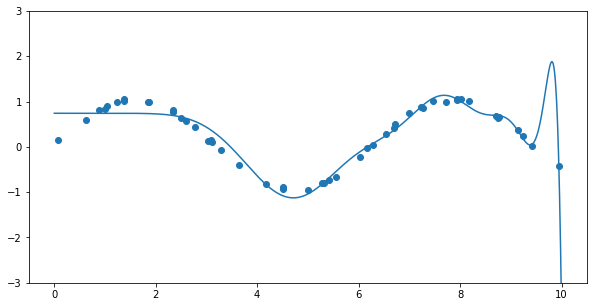

In [36]:
x = 10 * np.random.random((50,))
y = np.sin(x) + 0.1 * np.random.random((50,))

poly_model.fit(x[:, np.newaxis], y)
y_fit = poly_model.predict(x_fit[:, np.newaxis])

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.ylim([-3, 3])
plt.plot(x_fit, y_fit)
plt.show()

### Ridge regression

In [37]:
from sklearn.linear_model import Ridge
ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha=0.0201))

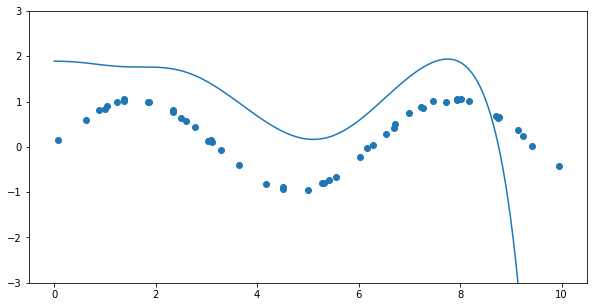

In [38]:
ridge_model.fit(x[:, np.newaxis], y)
y_fit = ridge_model.predict(x_fit[:, np.newaxis])

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.ylim([-3, 3])
plt.plot(x_fit, y_fit)
plt.show()

In [41]:
# Ridge Regression (L2 Regularization) reduce complexity of model and prevent from overfitting to outliers

### Lasso regression

In [39]:
from sklearn.linear_model import Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha=1))

/Users/lukasz/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


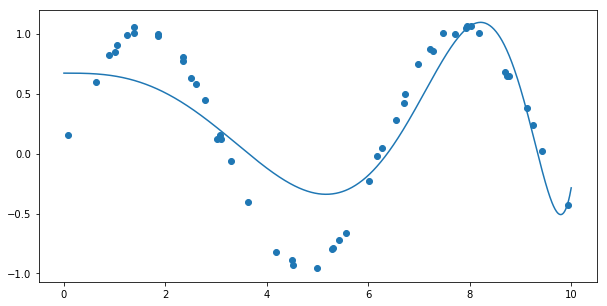

In [40]:
lasso_model.fit(x[:, np.newaxis], y)
y_fit = lasso_model.predict(x_fit[:, np.newaxis])

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.show()

In [42]:
# Lasso Regression (L1 Regularization) select a small number of important features 